In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
import lib
import plotting
import markov_chain as mc
import markov_tools as mt

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [5]:
from configparser import ConfigParser
cfg = ConfigParser()
cfg.read("config.cfg")

['config.cfg']

In [6]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm # we manually import the notebook submodule as the normal one struggles with jupyterlab
tqdm.pandas() # this enables us to use progress_apply instead of apply

In [7]:
results_prefix = "[WIKIDATA_PAPER]"

sequence_file = os.path.join(cfg.get("directory", "exchange"), results_prefix + "001_clustering.p")
labels_file = os.path.join(cfg.get("directory", "exchange"), "[wikidata]004_labels_readable.p")

In [8]:
df = pd.read_pickle(sequence_file)
df.head()

,bot_name,bot_sequence,length,length_nobreak,sequence,sequence_readable,user_id,user_name,stat_dist,kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6,kmeans_7,kmeans_8,kmeans_9,kmeans_10
0,False,False,1517,1385,"[REVERT_MANUAL, BREAK, CLAIM_CREATE, BREAK, CL...","[Revert Item, Break, Create Claim, Break, Crea...",1,Hoo man,"[0.033592832488441825, 0.029154644609674315, 0...",0,2,1,2,0,4,6,2,2
1,False,False,9,6,"[ENTITY_CREATE, BREAK, SITELINK_ADD, BREAK, ME...","[Create Item, Break, Add Sitelink, Break, Merg...",1000036,JShenk,"[0.02643738030717696, 0.02643738030717696, 0.0...",1,0,2,4,3,3,1,1,1
2,False,False,7,4,"[SITELINK_ADD, BREAK, SITELINK_ADD, BREAK, SIT...","[Add Sitelink, Break, Add Sitelink, Break, Add...",1000078,Egor-belikov,"[0.025412586144359806, 0.025412586144359806, 0...",1,1,0,3,1,2,4,4,4
3,False,False,9,6,"[ENTITY_CREATE, BREAK, SITELINK_REMOVE, SITELI...","[Create Item, Break, Remove Sitelink, Add Site...",100008,Wars,"[0.027056268692473535, 0.02705626869247354, 0....",1,1,0,3,1,2,4,1,1
4,False,False,44,23,"[SITELINK_ADD, BREAK, SITELINK_ADD, BREAK, SIT...","[Add Sitelink, Break, Add Sitelink, Break, Add...",100012,Kane 14,"[0.025862068965517248, 0.025862068965517244, 0...",1,1,0,3,1,2,4,4,4


In [9]:
labels = pd.read_pickle(labels_file)['label'].values

We test only one clustering (numer of clusters) at a time.  
For each label/action we conduct a pairwise tukey's test to highlight the actions that show significant difference.

Note: as this is a pairwise comparison for each single label this generates a lot of output!

In [10]:
len(df.iloc[0]['stat_dist'])

32

In [11]:
len(labels)

32

In [12]:
num_clusters = 4
df_selector = "kmeans_{n}".format(n=num_clusters)

### Tests on stat dist vectors

In [32]:
stat_dist_df = pd.DataFrame([x for x in df["stat_dist"].values], columns=labels)
stat_dist_df['cluster_id'] = df[df_selector].values
stat_dist_df

,Add Description,Add Item Alias,Add Label,Add Qualifier,Add Reference,Add Sitelink,Break,Create Claim,Create Item,Create Property,...,Remove Alias,Remove Claim,Remove Description,Remove Item,Remove Label,Remove Qualifier,Remove Reference,Remove Sitelink,Revert Item,cluster_id
0,0.033593,0.029155,0.034387,0.050540,0.025861,0.026999,0.040888,0.095465,0.026089,0.025861,...,0.026203,0.042354,0.026202,0.025861,0.026089,0.025861,0.025861,0.026316,0.038050,1
1,0.026437,0.026437,0.026437,0.026437,0.026437,0.045639,0.080646,0.026437,0.045639,0.026437,...,0.026437,0.026437,0.026437,0.026437,0.026437,0.026437,0.026437,0.026437,0.026437,2
2,0.025413,0.025413,0.025413,0.025413,0.025413,0.117678,0.119945,0.025413,0.025413,0.025413,...,0.025413,0.025413,0.025413,0.025413,0.025413,0.025413,0.025413,0.025413,0.025413,0
3,0.027056,0.027056,0.027056,0.027056,0.027056,0.078564,0.076439,0.027056,0.045256,0.027056,...,0.027056,0.027056,0.027056,0.027056,0.027056,0.027056,0.027056,0.042165,0.027056,0
4,0.025862,0.025862,0.025862,0.025862,0.025862,0.114074,0.110064,0.025862,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0
5,0.026205,0.077792,0.047230,0.026205,0.026205,0.034952,0.075386,0.036393,0.026205,0.026205,...,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,0.026205,2
6,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.043698,0.025862,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,2
7,0.051838,0.029300,0.069175,0.029300,0.029300,0.029300,0.029300,0.029300,0.029300,0.029300,...,0.029300,0.029300,0.029300,0.029300,0.029300,0.029300,0.029300,0.029300,0.029300,2
8,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.065746,0.076887,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.063431,2
9,0.025862,0.025862,0.025862,0.025862,0.025862,0.112069,0.112069,0.025862,0.025862,0.025862,...,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0.025862,0


In [41]:
sig_labels = []
for i, l in enumerate(labels):
    vals = stat_dist_df[l]
    lbls = stat_dist_df["cluster_id"]
    hsd = pairwise_tukeyhsd(vals, lbls, alpha=0.01)
    print("{l}: {s} / 6".format(l=l, s=sum(hsd.reject)))
    print(hsd.summary())
    
    if sum(hsd.reject) == 6:
        sig_labels.append(l)

Add Description: 5 / 6
Multiple Comparison of Means - Tukey HSD,FWER=0.01
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.0042   0.0034  0.005   True 
  0      2     0.0193   0.0187  0.0199  True 
  0      3    -0.0005  -0.0013  0.0003 False 
  1      2     0.0151   0.0144  0.0158  True 
  1      3    -0.0047  -0.0056 -0.0037  True 
  2      3    -0.0197  -0.0205  -0.019  True 
---------------------------------------------
Add Item Alias: 5 / 6
Multiple Comparison of Means - Tukey HSD,FWER=0.01
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     0.003    0.0027  0.0033  True 
  0      2     0.0049   0.0047  0.0051  True 
  0      3    -0.0001  -0.0004  0.0003 False 
  1      2     0.0019   0.0016  0.0022  True 
  1      3    -0.0031  -0.0034 -0.0027  True 
  2      3    -0.0049  -0.0053 -0.0046  True 
---------------------------------------------
Add Label: 6 / 6
Multiple

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

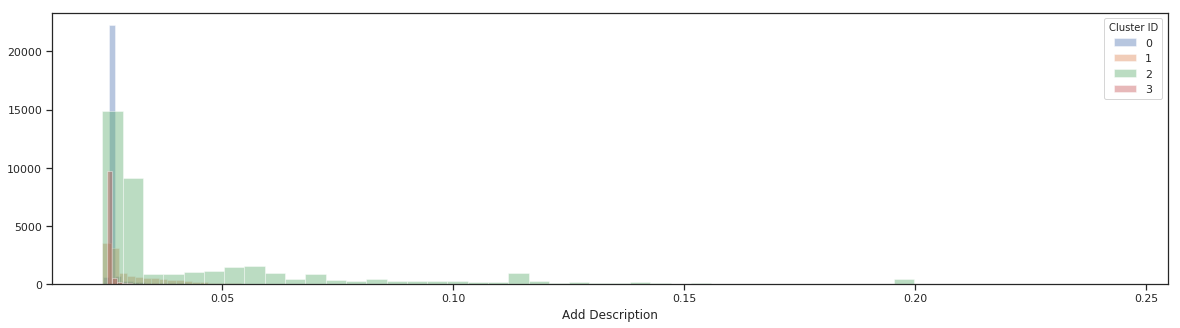

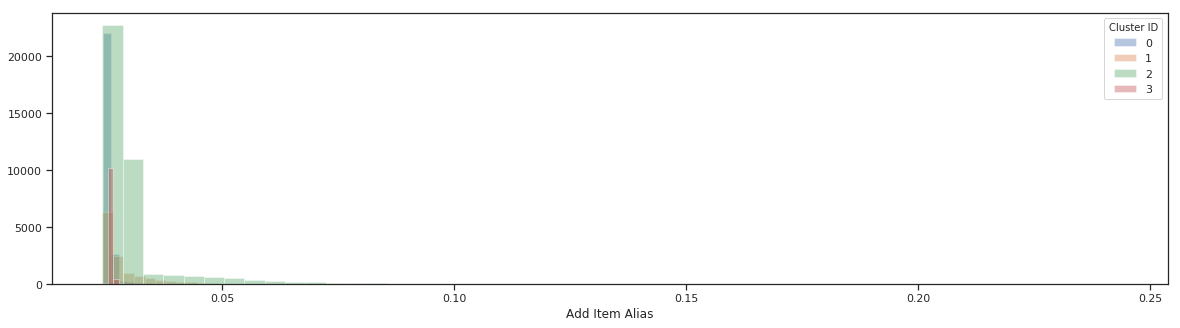

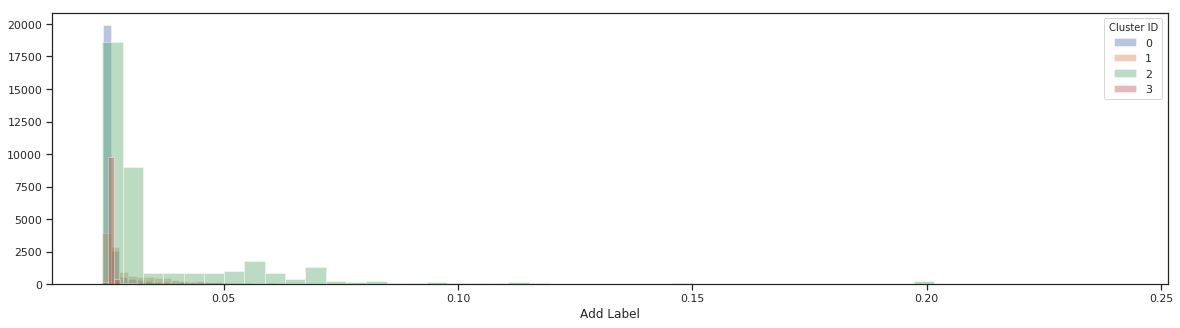

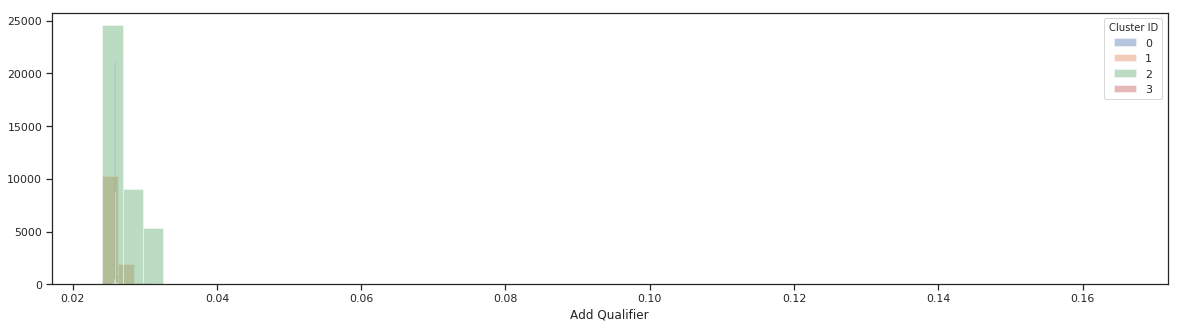

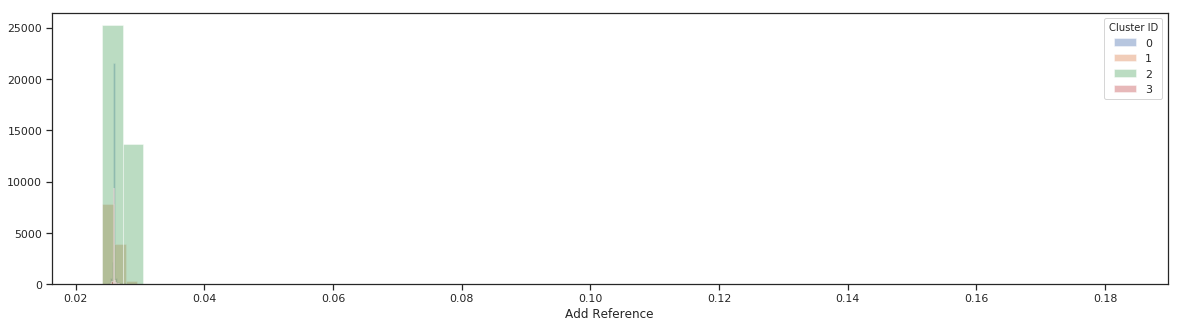

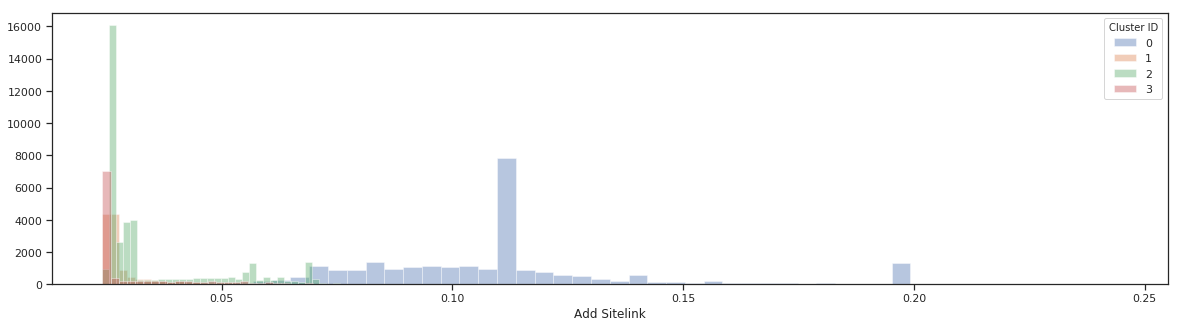

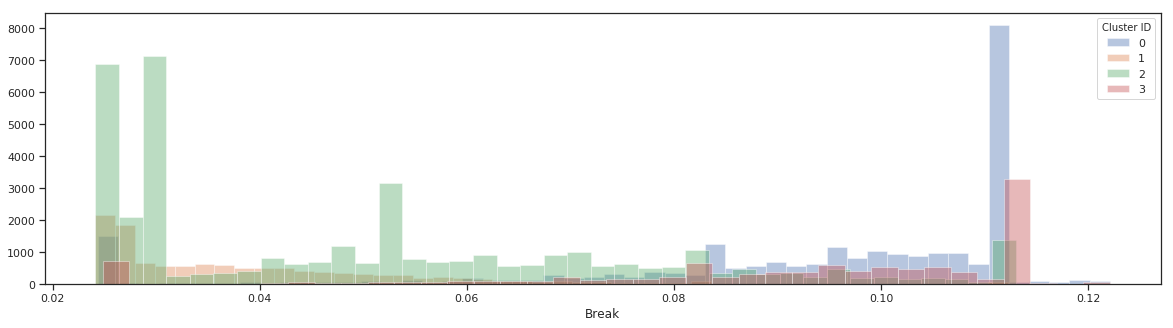

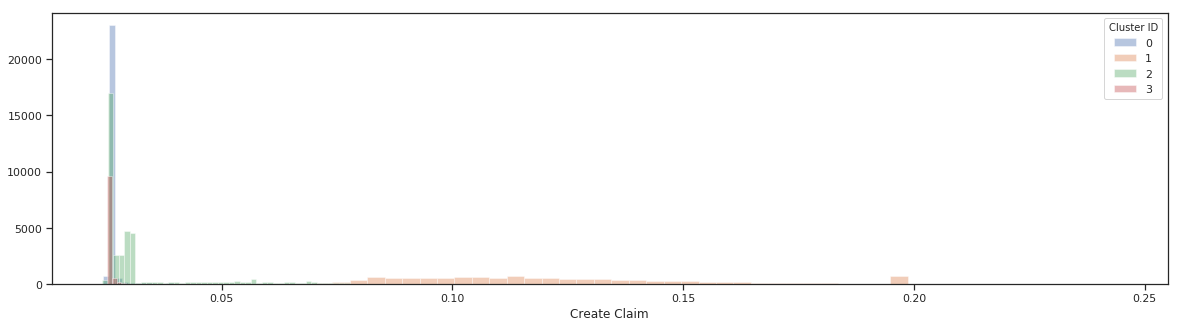

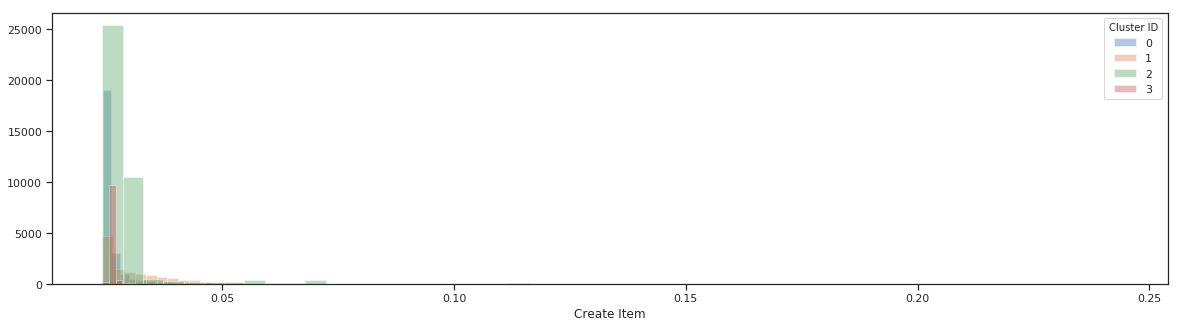

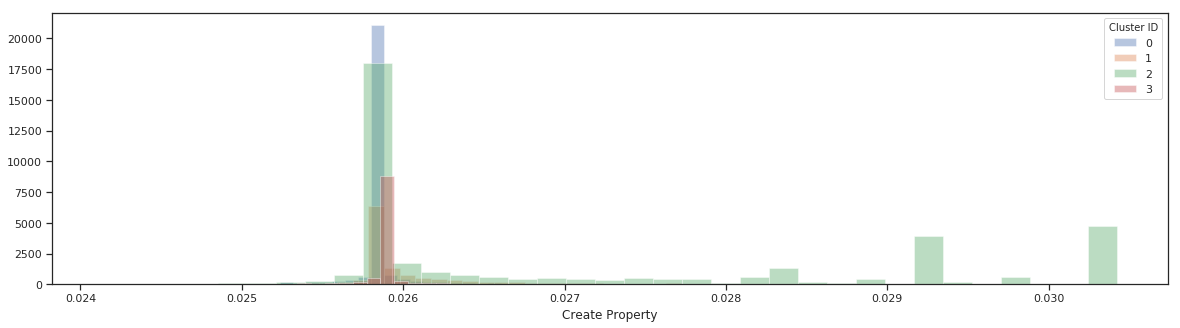

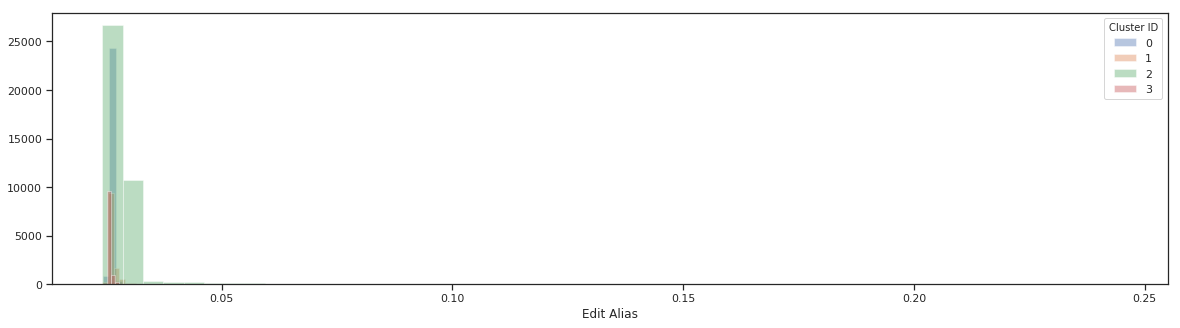

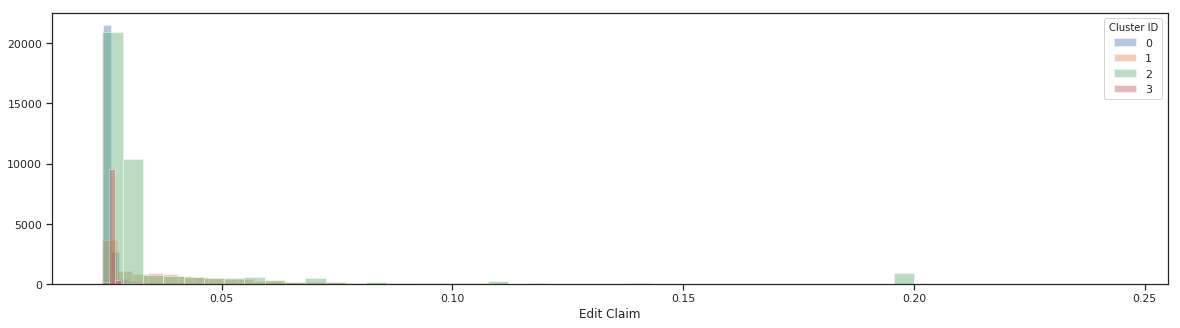

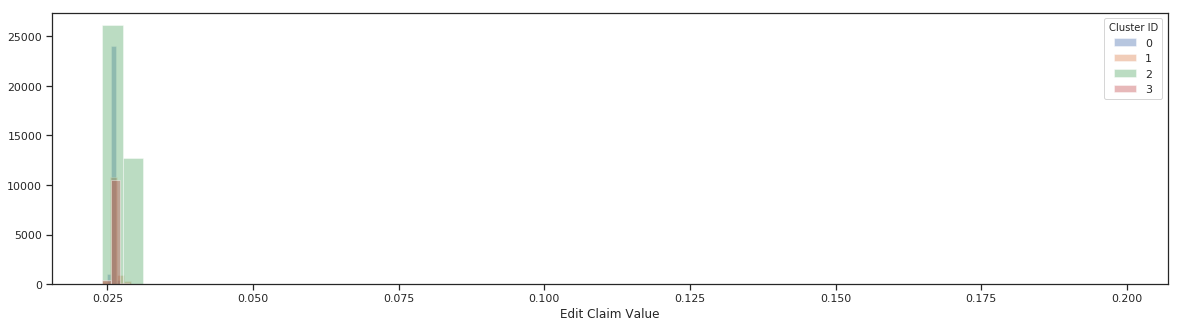

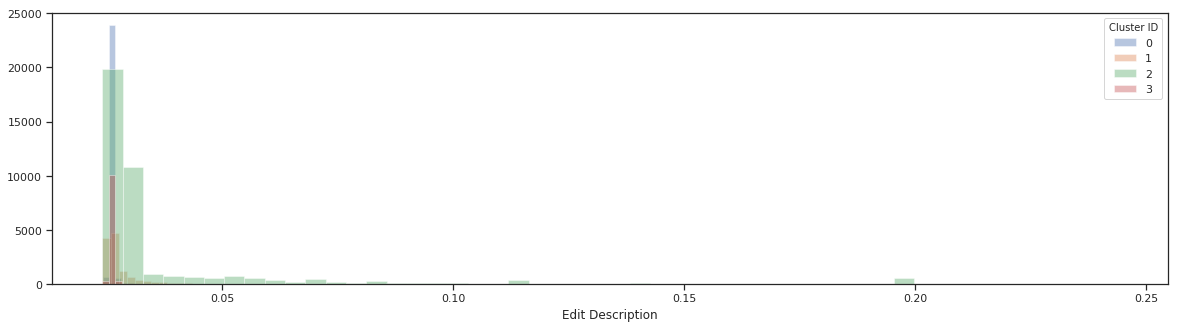

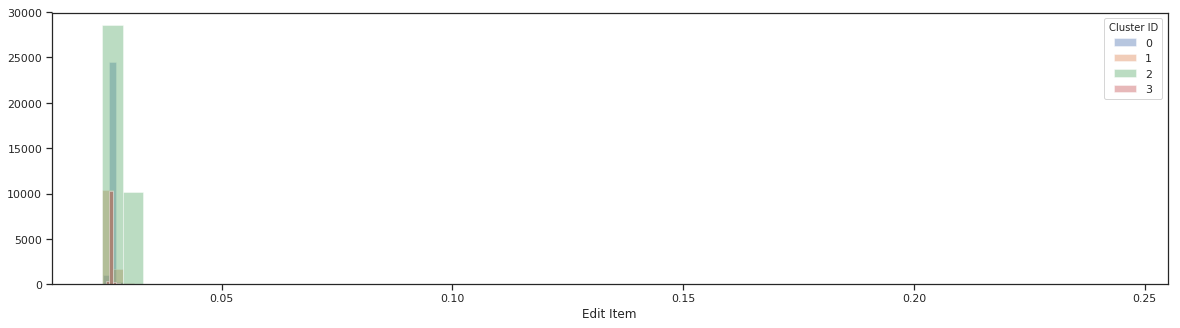

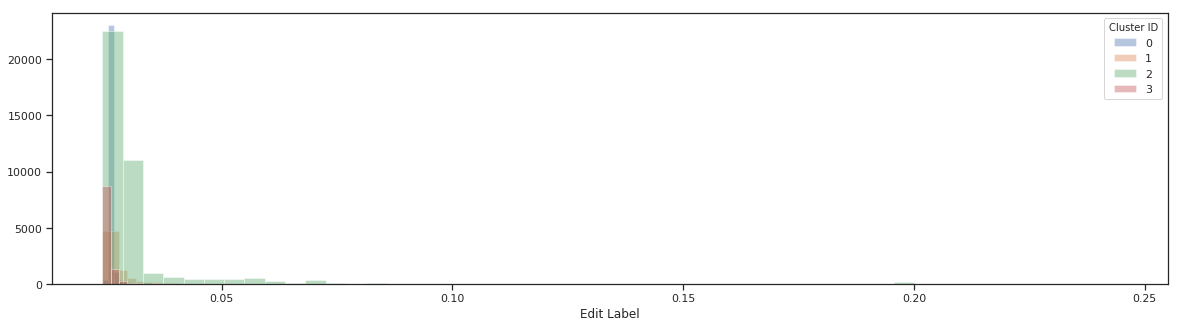

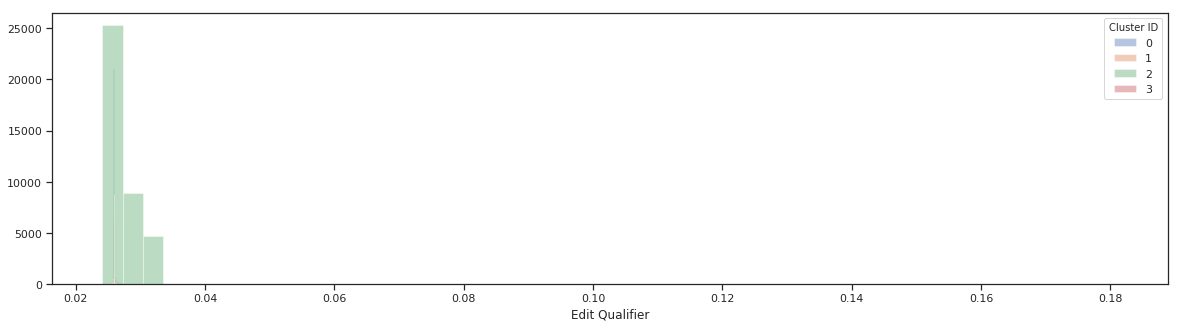

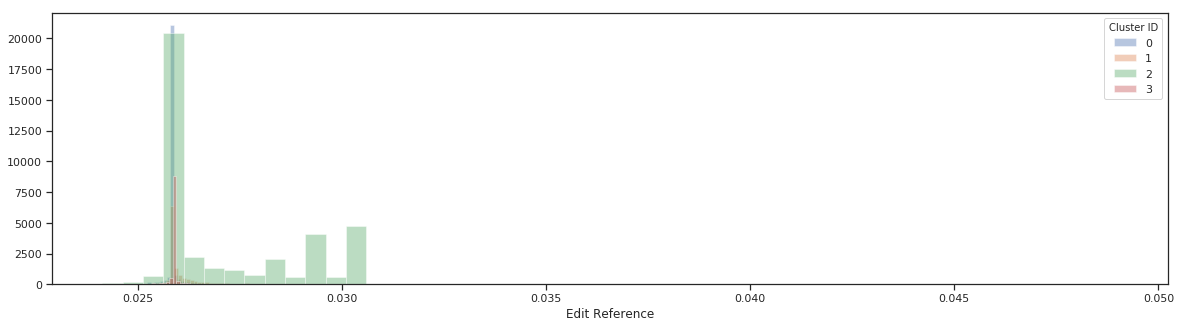

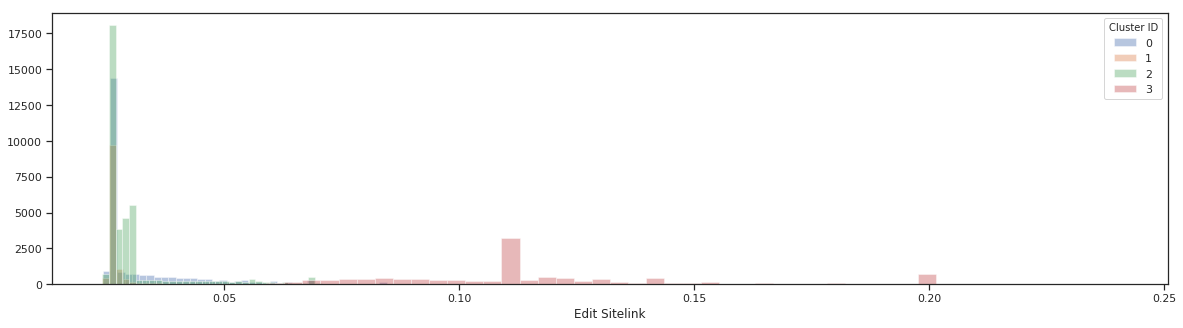

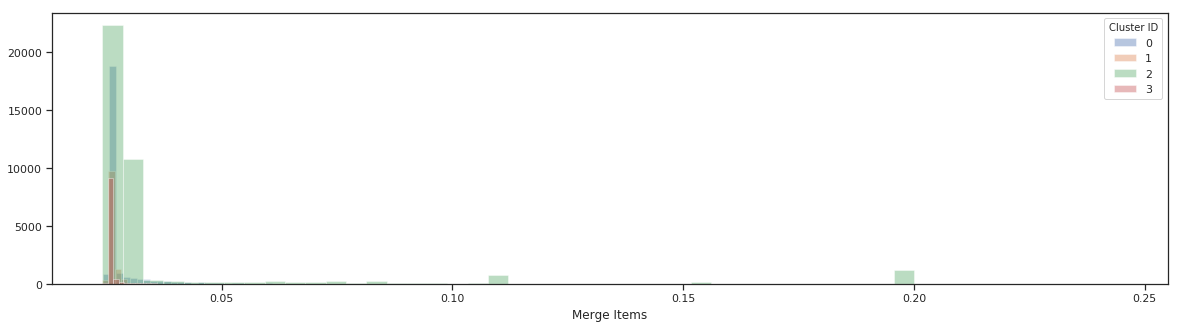

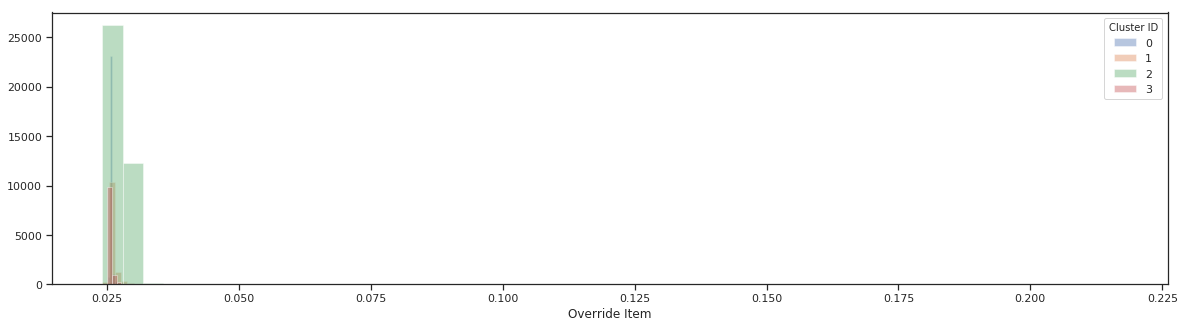

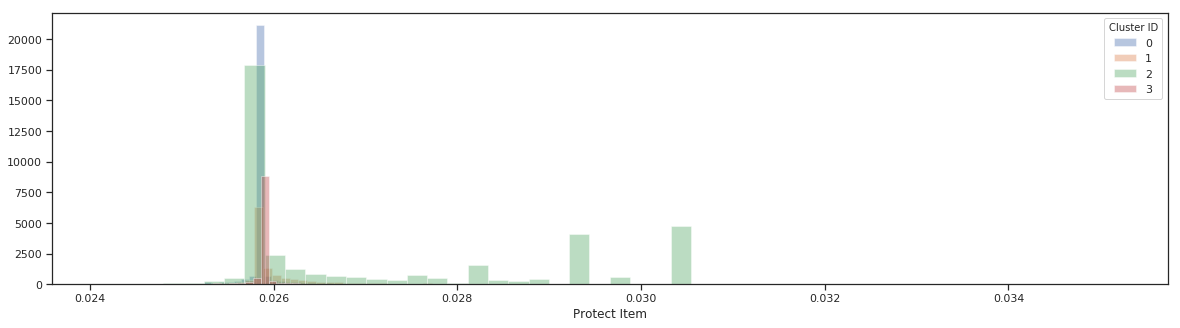

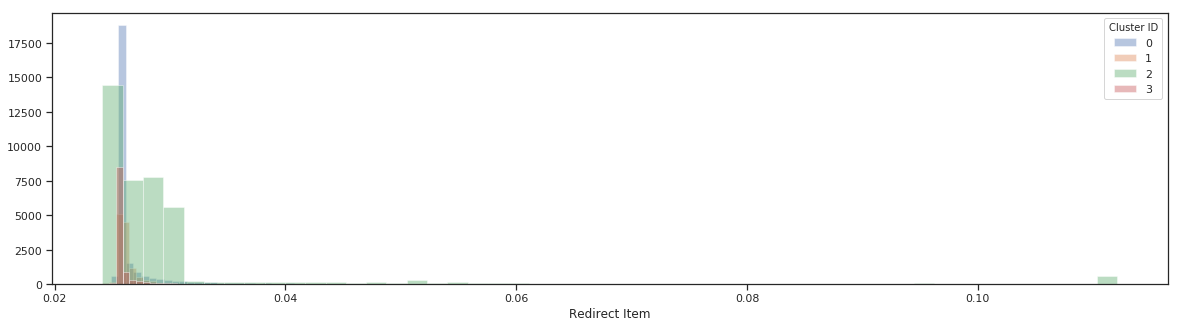

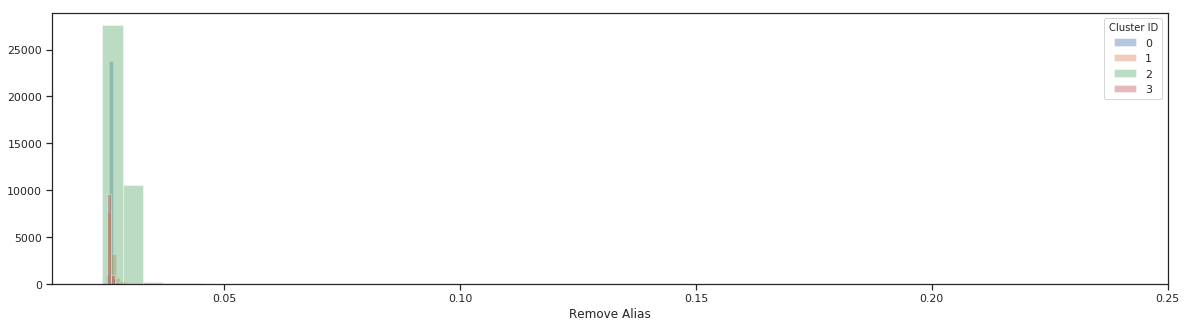

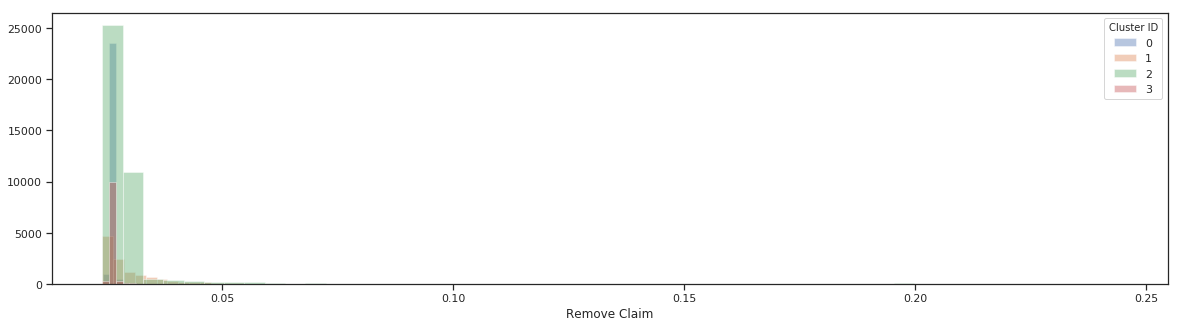

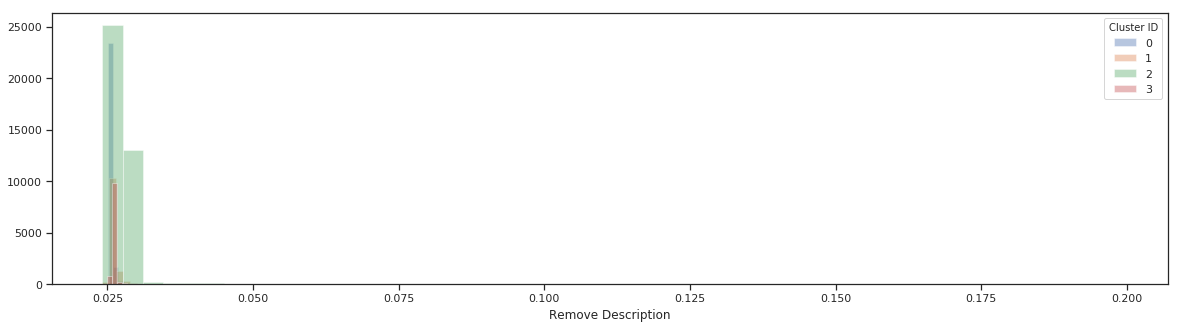

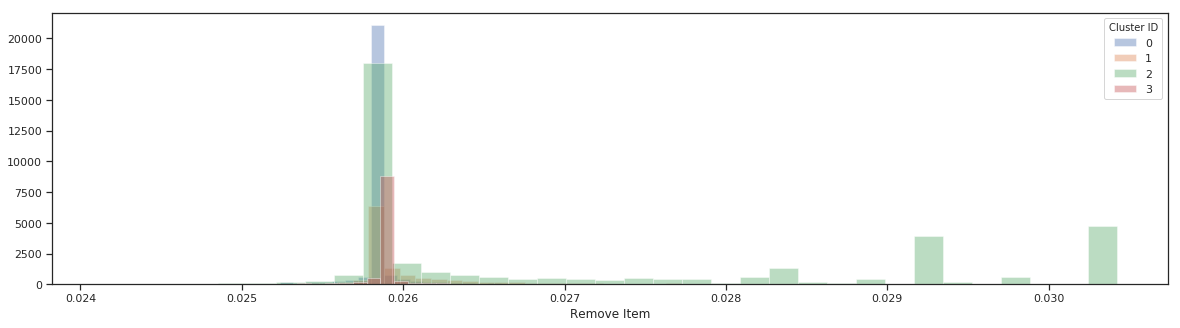

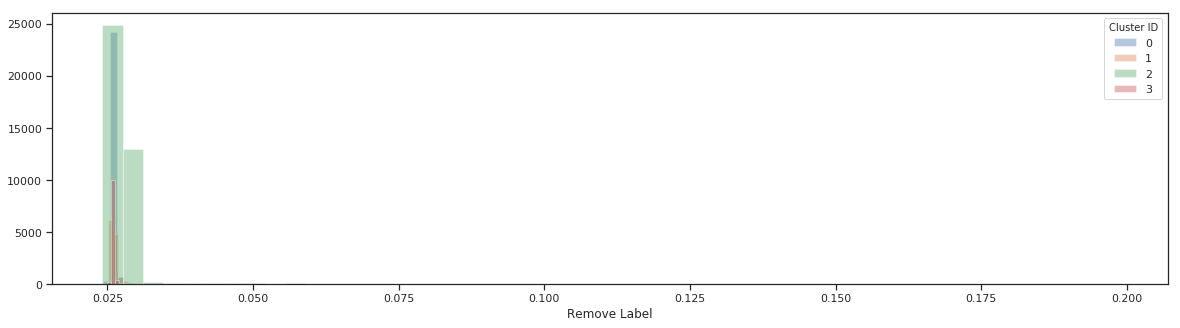

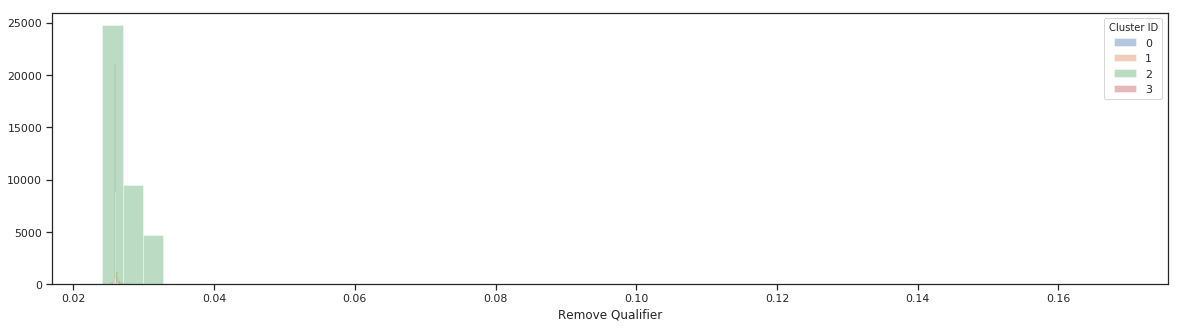

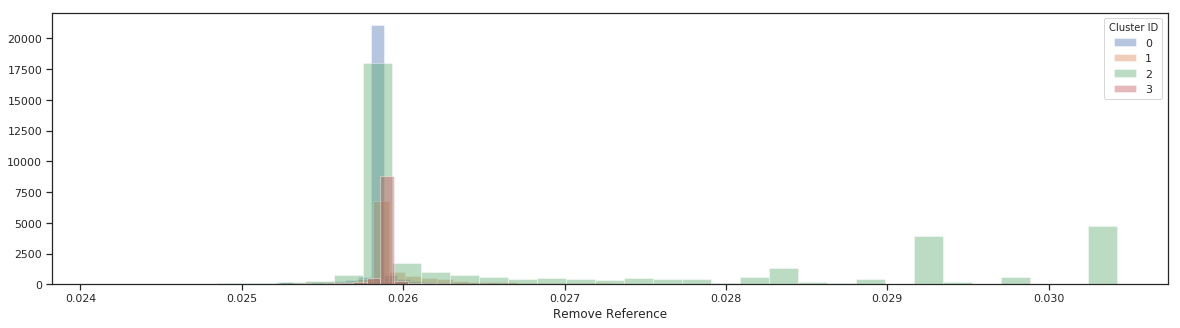

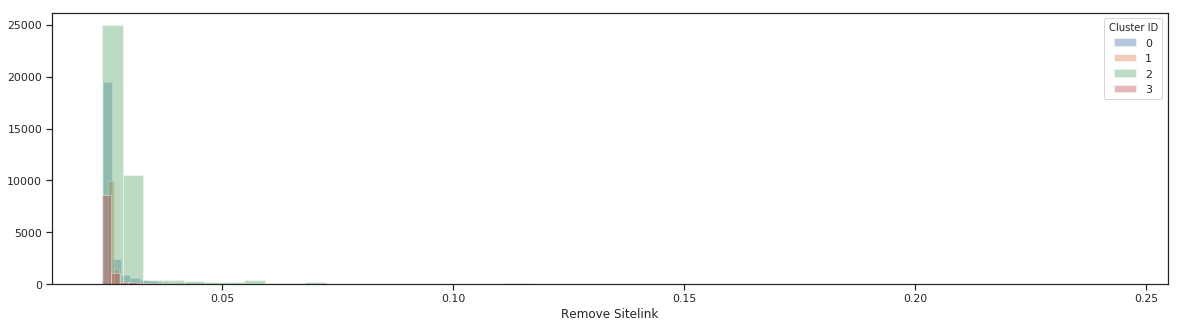

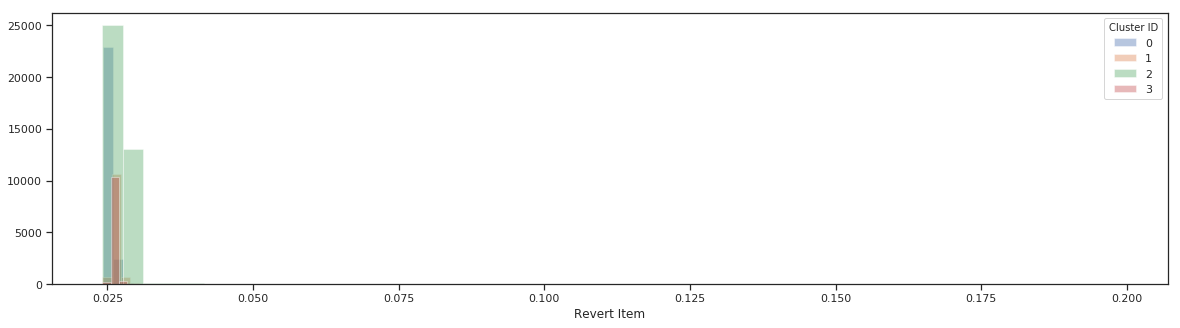

In [63]:
for i, l in enumerate(labels):    
    figure, axis = plt.subplots(figsize=(20,5))
    for c_id, c_members in stat_dist_df.groupby("cluster_id"):
        sns.distplot(c_members[l], hist=True, rug=False, kde=False, ax=axis, label=c_id)
    axis.legend(title="Cluster ID")